# Decision Tree Regression
"""
This notebook demonstrates how to implement and analyze **Decision Tree Regression** using Python.

### Topics covered:
- Theory of Decision Tree Regression
- Data preprocessing
- Model training and evaluation
- Visualizing the decision tree structure and feature importance

## Theory of Decision Tree Regression
Decision Tree Regression is a supervised learning algorithm used to predict a continuous target variable
by recursively splitting the data into subsets based on feature values. The tree structure consists of:
- **Root Node**: Represents the entire dataset and is the starting point of the tree.
- **Internal Nodes**: Represent decision points that split the data based on a feature and threshold.
- **Leaf Nodes**: Represent the final prediction values (average of the data points in the subset).

### Loss Functions
The algorithm minimizes a specified loss function at each split. Common criteria include:
- **Mean Squared Error (MSE)**:
  MSE = (1/N) * Σ (y_i - ŷ_i)^2
- **Mean Absolute Error (MAE)**:
  MAE = (1/N) * Σ |y_i - ŷ_i|

### How it Works:
1. The data is split recursively based on the feature that minimizes the splitting criterion (e.g., MSE).
2. This process continues until a stopping condition is met, such as a maximum depth or a minimum number of samples per leaf.
3. Predictions are made using the average value of the target variable in each leaf node.
"""


# House Price Analysis

## Step 1: Import Libraries
Let's start by importing the necessary libraries.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import plot_tree

## Step 2: Load and Explore the Dataset
We will use the **karachi house price dataset** from kaggle.

In [8]:
data = pd.read_csv('Karachi_House_Prices_Data.csv')
data.head()

,Unnamed: 0,Address,Price,NoOfBedrooms,NoOfBathrooms,AreaSqYards
0,0,"Bahria Town Karachi, Karachi",4200000.0,1.0,1.0,60
1,1,"Bahria Town - Precinct 17, Bahria Town Karachi",5900000.0,2.0,2.0,161
2,2,"Bahria Paradise, Bahria Town Karachi",42000000.0,5.0,5.0,500
3,3,"Askari 5 - Sector J, Askari 5",37500000.0,3.0,3.0,300
4,4,"Bahria Town - Precinct 35, Bahria Sports City",21000000.0,4.0,4.0,350


## Step 3: Preprocess the Data
We'll split the dataset into training and testing sets and scale the features for better performance.

In [10]:
# Splitting data
X= data.drop(columns=['Unnamed: 0', 'Price', 'Address'], axis=1)
y = data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
#Cleaned dataset
X.head()

,NoOfBedrooms,NoOfBathrooms,AreaSqYards
0,1.0,1.0,60
1,2.0,2.0,161
2,5.0,5.0,500
3,3.0,3.0,300
4,4.0,4.0,350


In [12]:
#Information of cleaned dataset
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16849 entries, 0 to 16848
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   NoOfBedrooms   16849 non-null  float64
 1   NoOfBathrooms  16849 non-null  float64
 2   AreaSqYards    16849 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 395.0 KB


In [13]:
#Description of cleaned dataset
X.describe()

,NoOfBedrooms,NoOfBathrooms,AreaSqYards
count,16849.000000,16849.00000,16849.000000
mean,3.599442,3.73856,238.193958
std,1.439704,1.46110,137.991019
min,1.000000,1.00000,33.000000
25%,3.000000,3.00000,122.000000
50%,3.000000,3.00000,200.000000
75%,5.000000,5.00000,311.000000
max,11.000000,10.00000,993.000000


# Step: 4 Data Normalization

In [14]:
#Scaling the dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Step: 5 Data Visualization

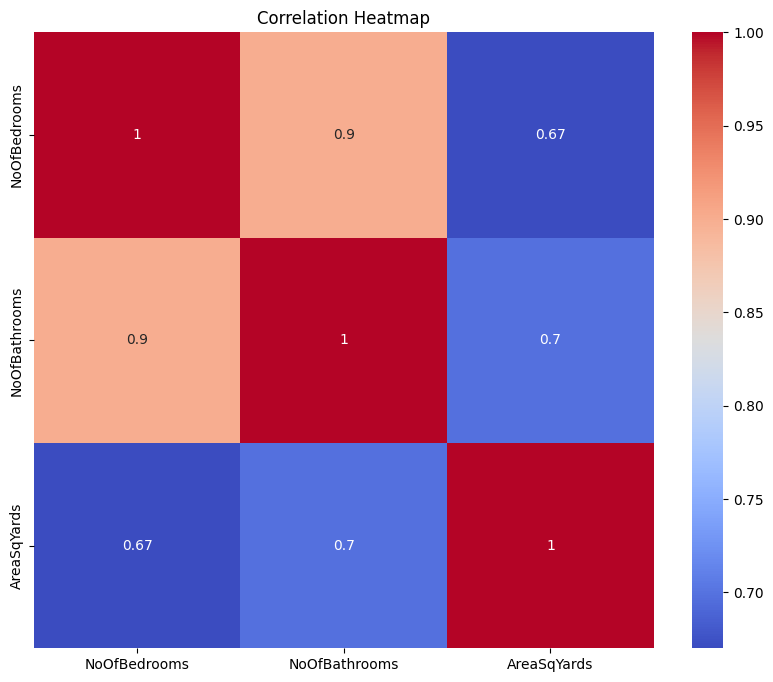

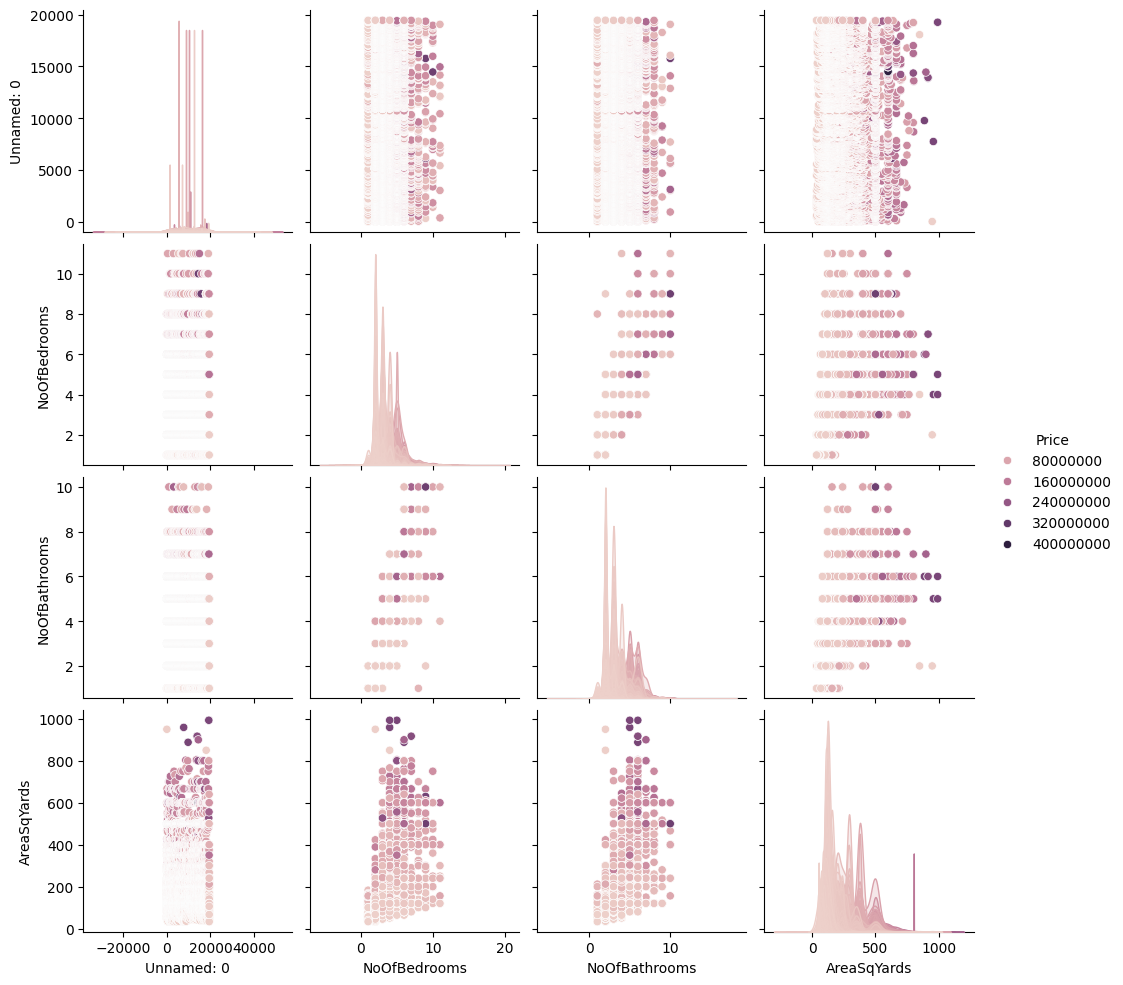

In [15]:
# Pairplot for initial exploration
sns.pairplot(data, hue='Price')  # Replace 'Target' with the target column
plt.show()


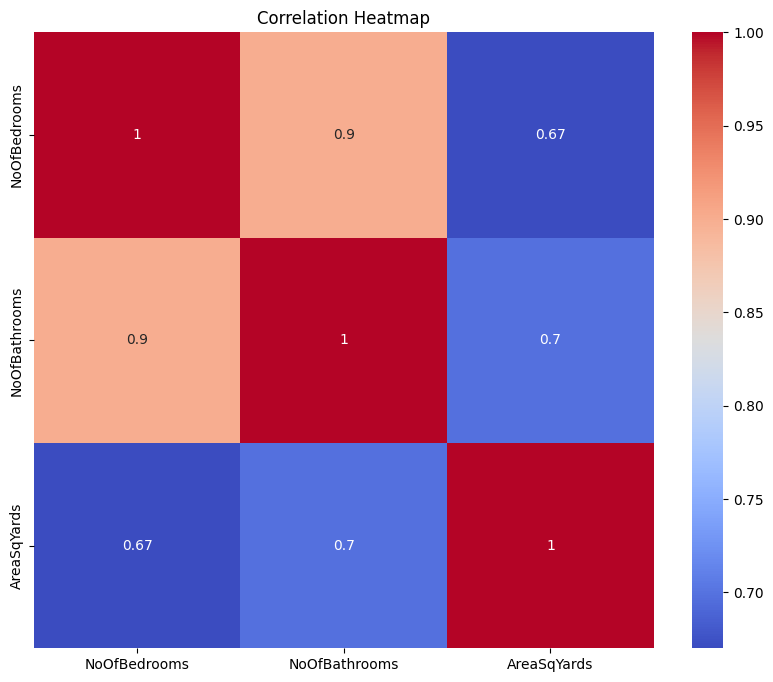

In [20]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Step: 6 Model Building

In [16]:
# Instantiate and train the model
regressor = DecisionTreeRegressor(criterion='squared_error', max_depth=5, random_state=42)
regressor.fit(X_train_scaled, y_train)

# Predictions
y_pred = regressor.predict(X_test_scaled)


# Step: 7 Model Visualization

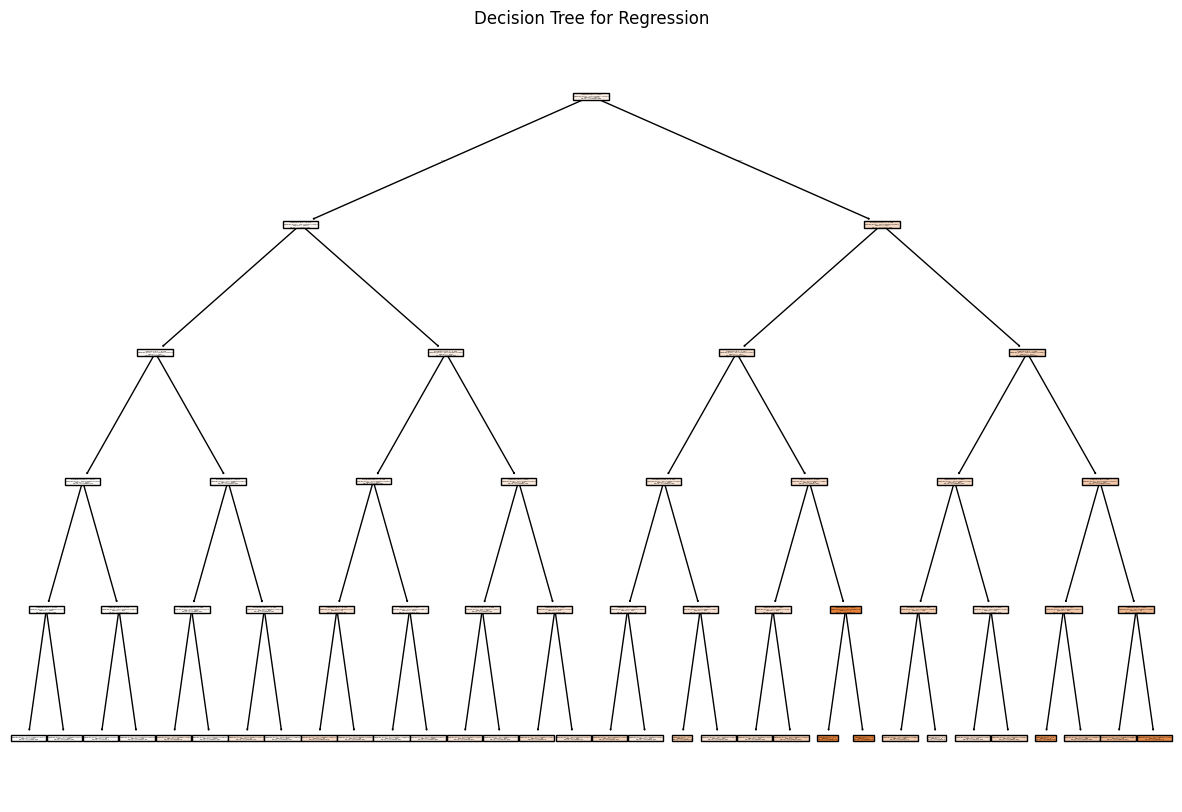

In [17]:
#Decision Tree Plot
plt.figure(figsize=(15, 10))
plot_tree(regressor, feature_names=X.columns, filled=True)
plt.title("Decision Tree for Regression")
plt.show()


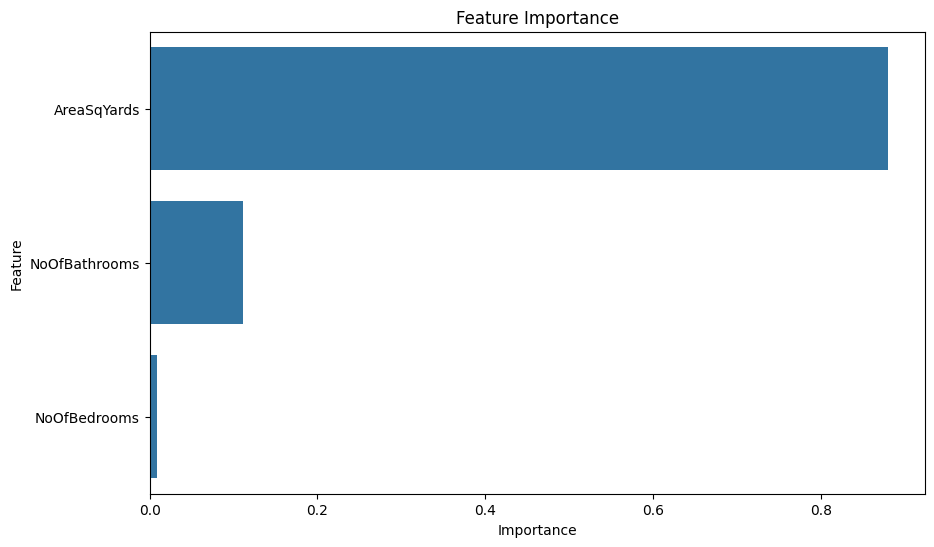

In [18]:
#Feature Importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': regressor.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title("Feature Importance")
plt.show()


# Step: 8 Model Evaluation


In [19]:
# Evaluation Metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-Squared Score: {r2:.2f}")


Mean Squared Error (MSE): 347960335101011.25
Mean Absolute Error (MAE): 10702170.96
R-Squared Score: 0.73
